# Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
from scipy import stats 
import statsmodels.api as sm
import plotly.express as px
import scipy.stats
from scipy.stats import chisquare

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Read Dataset into Pandas Dataframe

In [2]:
#Reading data into pandas df
df = pd.read_csv("https://raw.githubusercontent.com/chiraggarg95/DS-203-Assignments/Assignment_4/summer-products-with-rating-and-performance_2020-08.csv")

# Display part of Dataset

In [3]:
#Displaying part of datasetṣ
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


#Cleaning up of Dataset

### Note: This is being done on the basis of analysis performed earlier

## Replacing NaN values in rating count to 0.0

In [4]:
 # replacing null values by 0
df['rating_five_count'] = df['rating_five_count'].fillna(0)
df['rating_four_count'] = df['rating_four_count'].fillna(0)
df['rating_three_count'] = df['rating_three_count'].fillna(0)
df['rating_two_count'] = df['rating_two_count'].fillna(0)
df['rating_one_count'] = df['rating_one_count'].fillna(0)

Converting "units_sold" from float to int

In [5]:
df["units_sold"] = df["units_sold"].astype(int)

# Statisitcal Analysis

In [6]:
df['units_sold'].value_counts()

100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         49
50000      17
100000      6
8           4
1           3
7           2
3           2
2           2
6           1
Name: units_sold, dtype: int64

## Mean and Variance

In [7]:
units_sold = np.array([100, 1000, 5000, 10000, 20000])

print('Mean and variance of the prices for top 6 number of units sold values by data points available:')
print()

means = []
vars = []

for u in units_sold:
    var = df.sort_values(by='units_sold', ascending=False).groupby(['units_sold']).get_group(u)['price'].var()
    mean = df.sort_values(by='units_sold', ascending=False).groupby(['units_sold']).get_group(u)['price'].mean()
    pts = df['units_sold'].value_counts()[u]

    means.append(mean)
    vars.append(var)

    print('Number of units sold: ' + str(u))
    print('Data Points available: ' + str(pts))
    print()
    print('Mean of prices: ' + str(mean))
    print('Variance of prices: ' + str(var))
    print()
    print()

Mean and variance of the prices for top 6 number of units sold values by data points available:

Number of units sold: 100
Data Points available: 509

Mean of prices: 8.082082514734772
Variance of prices: 19.886048804201483


Number of units sold: 1000
Data Points available: 405

Mean of prices: 8.586666666666668
Variance of prices: 13.904377722772283


Number of units sold: 5000
Data Points available: 217

Mean of prices: 8.483087557603689
Variance of prices: 11.580815885816705


Number of units sold: 10000
Data Points available: 177

Mean of prices: 8.313559322033896
Variance of prices: 8.873871918335906


Number of units sold: 20000
Data Points available: 103

Mean of prices: 8.729611650485436
Variance of prices: 12.605401808490392




In [8]:
means = np.array(means)
vars = np.array(vars)

In [9]:
print(means.shape)
print(vars.shape)

(5,)
(5,)


## QQ-Plots

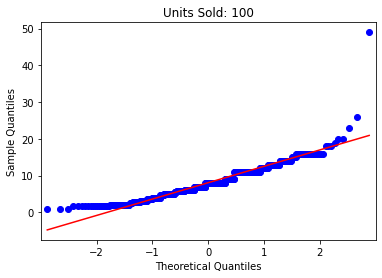

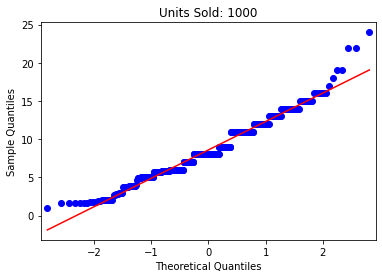

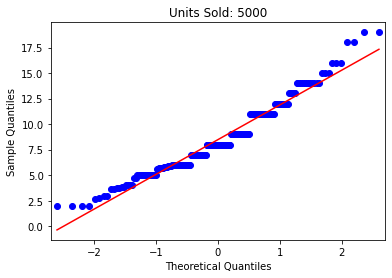

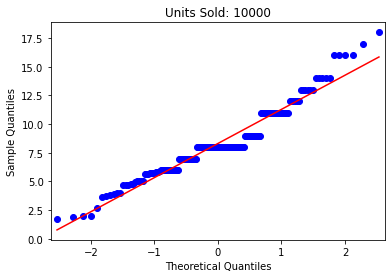

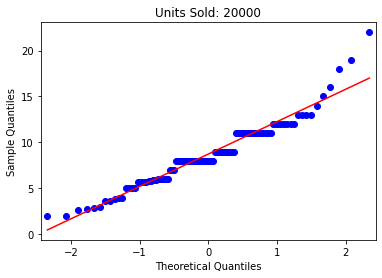

In [10]:
for u in units_sold:
    sm.qqplot(df.sort_values(by='units_sold', ascending=False).groupby(['units_sold']).get_group(u)['price'], line='s')
    plt.title('Units Sold: ' + str(u))
    plt.show()

## Log Likelihood wrt Gaussian Distribution


In [11]:
for i in range (0, 5):
    u = units_sold[i]
    mean = means[i]
    var = vars[i]
    print('Units Sold: ' + str(u))
    print('Log Likelihood: ' + str(np.sum(np.log(scipy.stats.norm.pdf(df.groupby(['units_sold']).get_group(u)['price'], mean, np.sqrt(var))))))
    print()

Units Sold: 100
Log Likelihood: -1482.6994014830411

Units Sold: 1000
Log Likelihood: -1107.1913622117847

Units Sold: 5000
Log Likelihood: -573.1641286898423

Units Sold: 10000
Log Likelihood: -443.8574633020444

Units Sold: 20000
Log Likelihood: -276.158128927898



#### The qq-plots and the Log Likelihood values correspond each other well. The closeness of the qq-plot to the straight line indicates that the distribution is more Normal. Also, a lower log likelihood value (MAGNITUDE WISE) indicates that the distribution is more normal.


## 95% Confidence Interval

In [12]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [13]:
for u in units_sold:
    conf_int = mean_confidence_interval(df.sort_values(by='units_sold', ascending=False).groupby(['units_sold']).get_group(u)['price'])
    print('Units Sold: ' + str(u))
    print('Confidence Interval: (' + str(conf_int[1]) + ', ' + str(conf_int[2]) + ')')
    print()

Units Sold: 100
Confidence Interval: (7.693753898716479, 8.47041113075307)

Units Sold: 1000
Confidence Interval: (8.222416828641824, 8.950916504691508)

Units Sold: 5000
Confidence Interval: (8.02775575740011, 8.938419357807264)

Units Sold: 10000
Confidence Interval: (7.871668844434072, 8.755449799633723)

Units Sold: 20000
Confidence Interval: (8.035721215150812, 9.423502085820061)



## Welch's t-test

In [14]:
df[df['units_sold'].isin(units_sold)].groupby(['units_sold']).mean()

,price,retail_price,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
units_sold,,,,,,,,,,,,,,,,,,,,,,,
100,8.082083,22.701375,0.479371,3.725246,33.351670,15.237721,6.404715,4.726916,2.412574,4.569745,0.094303,0.017682,0.051081,0.025540,28.956778,2.251473,0.003929,40.404715,49.734774,1.0,14746.937132,3.998240,0.104126
1000,8.586667,24.777778,0.461728,3.804765,280.187654,134.019753,53.780247,39.711111,19.271605,33.404938,0.118519,0.024691,0.083951,0.009877,34.367901,2.407407,0.002469,41.535802,49.975309,1.0,18053.303704,4.041770,0.175309
5000,8.483088,20.433180,0.382488,3.820092,872.447005,416.861751,166.470046,126.009217,61.566820,101.539171,0.105991,0.018433,0.087558,0.000000,35.875576,2.405530,0.000000,39.967742,50.000000,1.0,31417.612903,4.067306,0.124424
10000,8.313559,20.655367,0.412429,3.896836,1869.937853,931.548023,369.581921,262.293785,121.310734,185.203390,0.158192,0.022599,0.129944,0.005650,41.016949,2.384181,0.005650,40.124294,50.000000,1.0,49582.553672,4.086179,0.203390
20000,8.729612,26.932039,0.475728,3.867961,4581.155340,2197.572816,905.291262,682.864078,322.242718,473.184466,0.145631,0.019417,0.116505,0.009709,40.466019,2.407767,0.000000,38.466019,49.524272,1.0,63210.679612,4.108646,0.242718


#### 1000 and 5000 units_sold categories have the closest mean prices

### Shapiro test for checking whether the distribution is normal or not

In [15]:
stats.shapiro(df[df['units_sold']==1000]['price'])

(0.9668696522712708, 6.135557129027802e-08)

In [16]:
stats.shapiro(df[df['units_sold']==5000]['price'])

(0.9595999121665955, 8.003187758731656e-06)

#### Since both the p-values are less than 0.05, none of the distributions are normal

### Performing the welch t-test on both the distributions

In [17]:
def welch_ttest(x, y): 
    ## Welch-Satterthwaite Degrees of Freedom ##
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
    t, p = stats.ttest_ind(x, y, equal_var = False)
    
    print("\n",
          f"Welch's t-test= " + str(t), "\n",
          f"p-value = " + str(p), "\n")

welch_ttest(df[df['units_sold']==1000]['price'], df[df['units_sold']==5000]['price'])


 Welch's t-test= 0.34976257301603103 
 p-value = 0.7266710608857467 



#### Since the p-value is greater than 0.05, the null hypothesis is not rejected. This means that, means of the 2 distributions are same.

## Wilcoxon signed rank test

In [18]:
x = len(df[df['units_sold']==1000]['price'])
y = len(df[df['units_sold']==5000]['price'])

In [19]:
stats.wilcoxon(df[df['units_sold']==1000]['price'][0:min(x, y)], df[df['units_sold']==5000]['price'][0:min(x, y)])

WilcoxonResult(statistic=9725.5, pvalue=0.3871109151290314)

#### Since the p-value is greater than 0.05, the null hypothesis is not rejected. This means that, medians of the 2 distributions are same.

## Welch's Paired t-Test

In [20]:
def welch_ttest_paired(x, y): 
    ## Welch-Satterthwaite Degrees of Freedom ##
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
    t, p = stats.ttest_rel(x, y)
    
    print("\n",
          f"Welch's t-test= " + str(t), "\n",
          f"p-value = " + str(p), "\n")

welch_ttest_paired(df[df['units_sold']==1000]['price'][0:min(x, y)], df[df['units_sold']==5000]['price'][0:min(x, y)])


 Welch's t-test= 0.9674463422216838 
 p-value = 0.3344029258315039 



#### Since the p-value is greater than 0.05 , we accept the null hypothesis i.e. the paired distribution have same mean

## Coorelation among mean 'price', 'retail_price', 'rating', 'merchant_rating' and 'units_sold'


In [21]:
df_1 = df.groupby(['units_sold']).mean()[['price', 'retail_price', 'rating', 'merchant_rating']].reset_index()
# df_1 = df[['price', 'retail_price', 'rating', 'merchant_rating']]
df_1

,units_sold,price,retail_price,rating,merchant_rating
0,1,9.240000,17.666667,5.000000,3.853679
1,2,13.500000,13.000000,3.500000,4.151046
2,3,9.905000,22.500000,5.000000,4.121399
3,6,6.000000,17.000000,5.000000,4.049640
4,7,8.000000,32.000000,5.000000,4.150543
5,8,7.750000,58.750000,5.000000,3.924989
6,10,8.443878,33.000000,4.182653,3.884710
7,50,7.853553,19.657895,3.878421,3.960837
8,100,8.082083,22.701375,3.725246,3.998240
9,1000,8.586667,24.777778,3.804765,4.041770


In [22]:
df_1_corr = df_1.corr()
df_1_corr

,units_sold,price,retail_price,rating,merchant_rating
units_sold,1.000000,-0.436201,0.021265,-0.303535,0.161897
price,-0.436201,1.000000,-0.294865,-0.212473,0.217908
retail_price,0.021265,-0.294865,1.000000,0.351418,-0.283022
rating,-0.303535,-0.212473,0.351418,1.000000,-0.230896
merchant_rating,0.161897,0.217908,-0.283022,-0.230896,1.000000


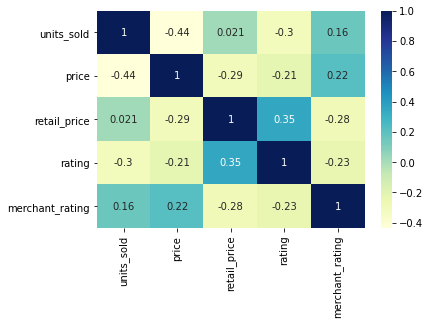

In [23]:
sns.heatmap(df_1_corr, annot=True, cmap="YlGnBu")

## Chi-squared test on Discrete variables

In [24]:
chisquare(df['uses_ad_boosts'])

Power_divergenceResult(statistic=892.0, pvalue=1.0)

In [25]:
chisquare(df['shipping_option_price'])

Power_divergenceResult(statistic=703.3754404987801, pvalue=1.0)

#### The results of the chi squared tests on the two discrete variables show that they are not correlated when it comes to price